# **(Sales Price Correlation Study)**

## Objectives

* Performing a correlation study to investigate the most relevant variables correlated to the sale price.

## Inputs

* outputs/datasets_collection/house_prices.csv 

## Outputs

* Generating code to answer buiness requiremnt 1 and to use in our Streamlit App. 

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [3]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing-project/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [4]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [5]:
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing-project'

---

# Loading Kaggle data

Import the pandas library
Load the dataset as a pandas DataFrame and assign it to df
View the first five rows of the data in the df variable

In [6]:
import pandas as pd
df = pd.read_csv(f"outputs/datasets_collection/housing_prices.csv")
df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


---

Check data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1374 non-null   float64
 2   BedroomAbvGr   1361 non-null   float64
 3   BsmtExposure   1460 non-null   object 
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinType1   1346 non-null   object 
 6   BsmtUnfSF      1460 non-null   int64  
 7   EnclosedPorch  136 non-null    float64
 8   GarageArea     1460 non-null   int64  
 9   GarageFinish   1298 non-null   object 
 10  GarageYrBlt    1379 non-null   float64
 11  GrLivArea      1460 non-null   int64  
 12  KitchenQual    1460 non-null   object 
 13  LotArea        1460 non-null   int64  
 14  LotFrontage    1201 non-null   float64
 15  MasVnrArea     1452 non-null   float64
 16  OpenPorchSF    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  OverallQ

# Data Exploration
* Checking missing levels, variable type and distribution and finding relatability of target with each variable.

In [8]:
from pandas_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Correlation Analyses
* Calculating correlation coefficients from four object data type categorical variables in the dataset.

In [9]:
missing_data_variables = df[df.columns[df.isna().sum() > 0]]
missing_data_variables

,2ndFlrSF,BedroomAbvGr,BsmtFinType1,EnclosedPorch,GarageFinish,GarageYrBlt,LotFrontage,MasVnrArea,WoodDeckSF
0,854.0,3.0,GLQ,0.0,RFn,2003.0,65.0,196.0,0.0
1,0.0,3.0,ALQ,NaN,RFn,1976.0,80.0,0.0,NaN
2,866.0,3.0,GLQ,0.0,RFn,2001.0,68.0,162.0,NaN
3,NaN,NaN,ALQ,NaN,Unf,1998.0,60.0,0.0,NaN
4,NaN,4.0,GLQ,0.0,RFn,2000.0,84.0,350.0,NaN
...,...,...,...,...,...,...,...,...,...
1455,694.0,3.0,Unf,NaN,RFn,1999.0,62.0,0.0,0.0
1456,0.0,NaN,ALQ,NaN,Unf,1978.0,85.0,119.0,NaN
1457,1152.0,4.0,GLQ,NaN,RFn,1941.0,66.0,0.0,NaN
1458,0.0,2.0,NaN,112.0,Unf,1950.0,68.0,0.0,NaN


In [10]:
missingdata_categorial_variables = (missing_data_variables
                    .columns[missing_data_variables.dtypes == 'object']
                    .to_list())
missingdata_categorial_variables

['BsmtFinType1', 'GarageFinish']

In [13]:
from feature_engine.imputation import CategoricalImputer
categorical_imputer = CategoricalImputer(imputation_method='frequent',
                                         variables=missingdata_categorial_variables)
df = categorical_imputer.fit_transform(df)

In [14]:
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(variables=missingdata_categorial_variables, drop_last=False)
df_ohe = encoder.fit_transform(df)
print(df_ohe.shape)
df_ohe.head(3)

(1460, 33)


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageYrBlt,GrLivArea,...,BsmtFinType1_ALQ,BsmtFinType1_Unf,BsmtFinType1_Rec,BsmtFinType1_BLQ,BsmtFinType1_None,BsmtFinType1_LwQ,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Fin,GarageFinish_None
0,856,854.0,3.0,No,706,150,0.0,548,2003.0,1710,...,0,0,0,0,0,0,1,0,0,0
1,1262,0.0,3.0,Gd,978,284,NaN,460,1976.0,1262,...,1,0,0,0,0,0,1,0,0,0
2,920,866.0,3.0,Mn,486,434,0.0,608,2001.0,1786,...,0,0,0,0,0,0,1,0,0,0


In [15]:
corr_spearman = df_ohe.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

OverallQual     0.809829
GrLivArea       0.731310
YearBuilt       0.652682
GarageArea      0.649379
TotalBsmtSF     0.602725
GarageYrBlt     0.593788
1stFlrSF        0.575408
YearRemodAdd    0.571159
OpenPorchSF     0.477561
LotArea         0.456461
Name: SalePrice, dtype: float64

In [17]:
corr_pearson = df_ohe.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

OverallQual         0.790982
GrLivArea           0.708624
GarageArea          0.623431
TotalBsmtSF         0.613581
1stFlrSF            0.605852
YearBuilt           0.522897
YearRemodAdd        0.507101
GarageYrBlt         0.486362
MasVnrArea          0.477493
BsmtFinType1_GLQ    0.400764
Name: SalePrice, dtype: float64

In [18]:
variables_to_study = set(corr_spearman.index.to_list()+corr_pearson.index.to_list())
variables_to_study

{'1stFlrSF',
 'BsmtFinType1_GLQ',
 'GarageArea',
 'GarageYrBlt',
 'GrLivArea',
 'LotArea',
 'MasVnrArea',
 'OpenPorchSF',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd'}

In [19]:
eda_dataframe = df_ohe.filter(['1stFlrSF',
 'BsmtFinType1_GLQ',
 'GarageArea',
 'GarageYrBlt',
 'GrLivArea',
 'LotArea',
 'MasVnrArea',
 'OpenPorchSF',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd', 'SalePrice'])
eda_dataframe.head(7)

,1stFlrSF,BsmtFinType1_GLQ,GarageArea,GarageYrBlt,GrLivArea,LotArea,MasVnrArea,OpenPorchSF,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,1,548,2003.0,1710,8450,196.0,61,7,856,2003,2003,208500
1,1262,0,460,1976.0,1262,9600,0.0,0,6,1262,1976,1976,181500
2,920,1,608,2001.0,1786,11250,162.0,42,7,920,2001,2002,223500
3,961,0,642,1998.0,1717,9550,0.0,35,7,756,1915,1970,140000
4,1145,1,836,2000.0,2198,14260,350.0,84,8,1145,2000,2000,250000
5,796,1,480,1993.0,1362,14115,0.0,30,5,796,1993,1995,143000
6,1694,1,636,2004.0,1694,10084,186.0,57,8,1686,2004,2005,307000


# Data Visualisation

In [20]:
from feature_engine.discretisation import EqualFrequencyDiscretiser
discretiser = EqualFrequencyDiscretiser(q=6, variables=['SalePrice'])
discretiser.fit(eda_dataframe)
eda_dataframe = discretiser.transform(eda_dataframe)
eda_dataframe

,1stFlrSF,BsmtFinType1_GLQ,GarageArea,GarageYrBlt,GrLivArea,LotArea,MasVnrArea,OpenPorchSF,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,1,548,2003.0,1710,8450,196.0,61,7,856,2003,2003,4
1,1262,0,460,1976.0,1262,9600,0.0,0,6,1262,1976,1976,3
2,920,1,608,2001.0,1786,11250,162.0,42,7,920,2001,2002,4
3,961,0,642,1998.0,1717,9550,0.0,35,7,756,1915,1970,2
4,1145,1,836,2000.0,2198,14260,350.0,84,8,1145,2000,2000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,0,460,1999.0,1647,7917,0.0,40,6,953,1999,2000,3
1456,2073,0,500,1978.0,2073,13175,119.0,0,6,1542,1978,1988,4
1457,1188,1,252,1941.0,2340,9042,0.0,60,7,1152,1941,2006,5
1458,1078,0,240,1950.0,1078,9717,0.0,0,5,1078,1950,1996,2


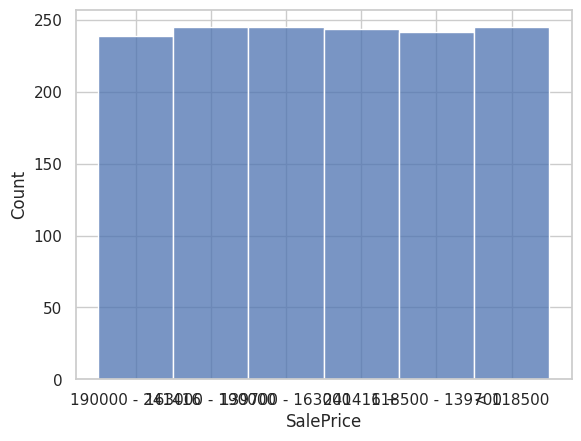

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(style="whitegrid")


sns.histplot(data=eda_dataframe, x='SalePrice')
plt.show()

In [37]:
discretiser.binner_dict_

{'SalePrice': [-inf,
  118500.0,
  139700.0,
  163000.0,
  190000.0,
  241416.66666666663,
  inf]}

In [39]:
labels = discretiser.binner_dict_['SalePrice']
q_value = len(labels)-1
labels_map = {}

for x in range(0, q_value):
    if x == 0:
        labels_map[x] = f"< {int(labels[1])}"
    elif x < q_value - 1:
        labels_map[x] = f"{int(labels[x])} - {int(labels[x+1])}"
    else:
        labels_map[x] = f"{int(labels[x])} +"

labels_map

{0: '< 118500',
 1: '118500 - 139700',
 2: '139700 - 163000',
 3: '163000 - 190000',
 4: '190000 - 241416',
 5: '241416 +'}

In [40]:
eda_dataframe["SalePrice"] = eda_dataframe["SalePrice"].replace(labels_map)
eda_dataframe

,1stFlrSF,BsmtFinType1_GLQ,GarageArea,GarageYrBlt,GrLivArea,LotArea,MasVnrArea,OpenPorchSF,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,1,548,2003.0,1710,8450,196.0,61,7,856,2003,2003,190000 - 241416
1,1262,0,460,1976.0,1262,9600,0.0,0,6,1262,1976,1976,163000 - 190000
2,920,1,608,2001.0,1786,11250,162.0,42,7,920,2001,2002,190000 - 241416
3,961,0,642,1998.0,1717,9550,0.0,35,7,756,1915,1970,139700 - 163000
4,1145,1,836,2000.0,2198,14260,350.0,84,8,1145,2000,2000,241416 +
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,0,460,1999.0,1647,7917,0.0,40,6,953,1999,2000,163000 - 190000
1456,2073,0,500,1978.0,2073,13175,119.0,0,6,1542,1978,1988,190000 - 241416
1457,1188,1,252,1941.0,2340,9042,0.0,60,7,1152,1941,2006,241416 +
1458,1078,0,240,1950.0,1078,9717,0.0,0,5,1078,1950,1996,139700 - 163000


In [41]:
hue_order = labels_map.values()
list(hue_order)

['< 118500',
 '118500 - 139700',
 '139700 - 163000',
 '163000 - 190000',
 '190000 - 241416',
 '241416 +']

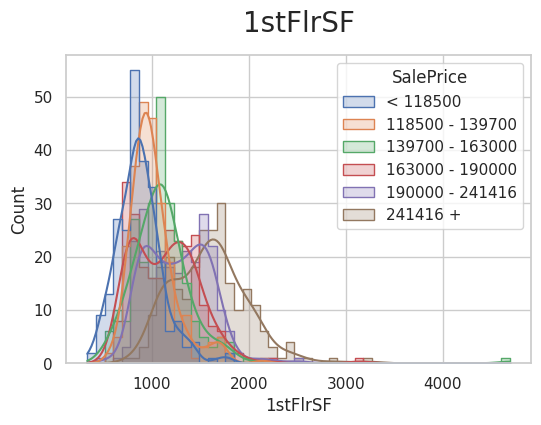

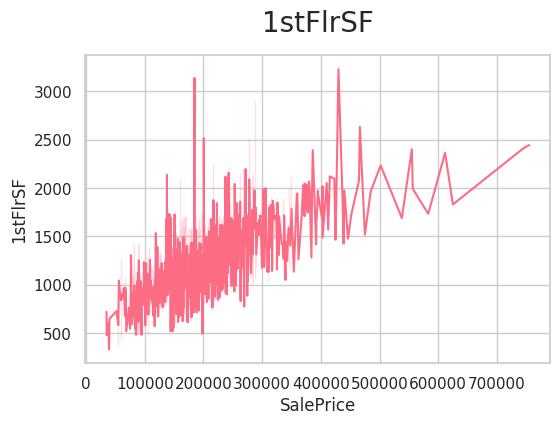

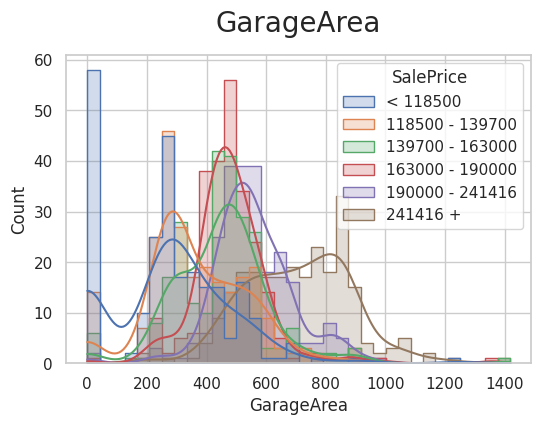

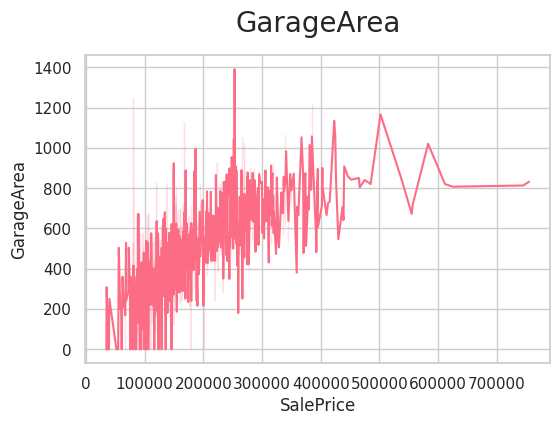

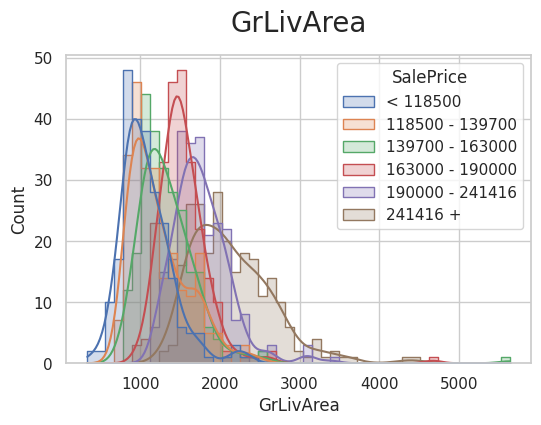

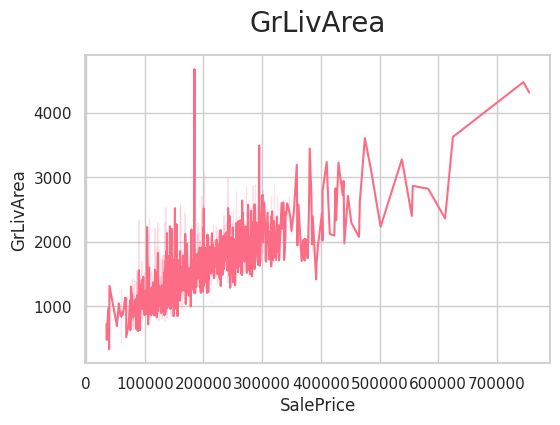

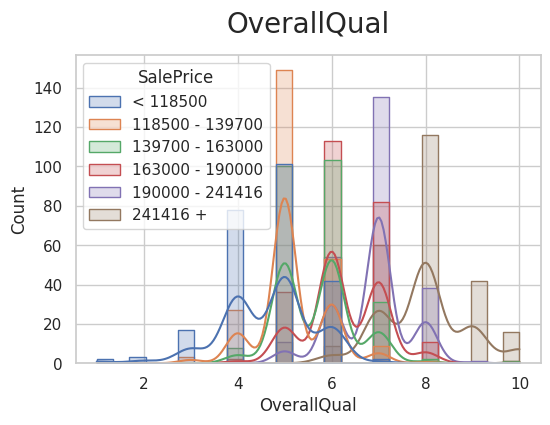

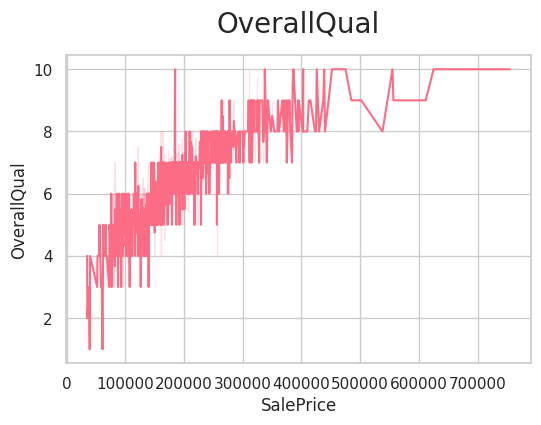

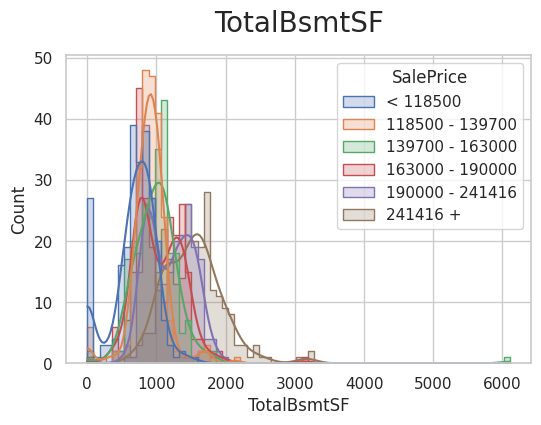

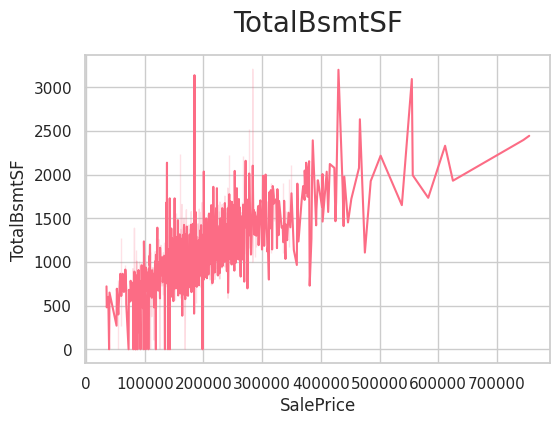

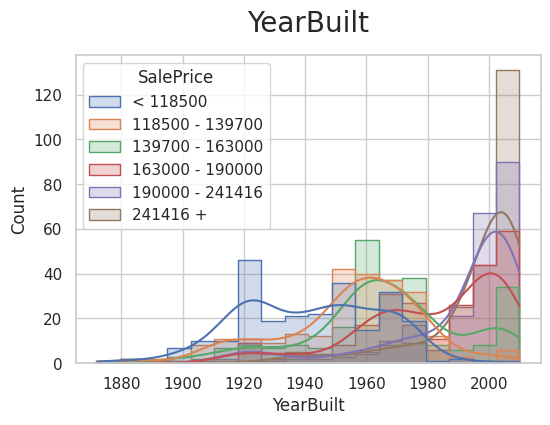

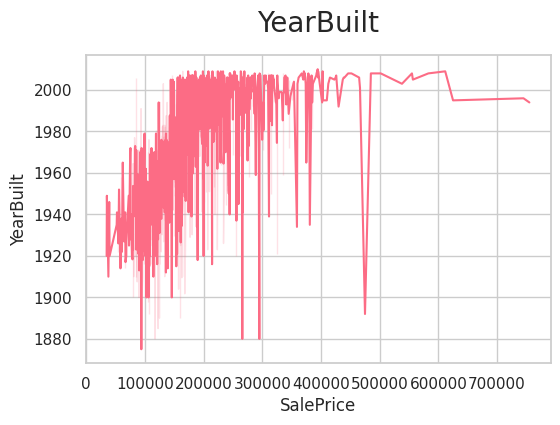

In [44]:
import numpy as np

def plot_numerical(df, col, target_var, hue_order):
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue=target_var, hue_order=hue_order, kde=True,
                 element="step")
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()


def plot_line(df, col, target_var):
    plt.figure(figsize=(6, 4))
    sns.lineplot(data=df, x=target_var, y=col, color='#FC6C85')
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()


target_var = 'SalePrice'
for col in ['1stFlrSF', 'GarageArea', 'GrLivArea', 'OverallQual',
            'TotalBsmtSF', 'YearBuilt']:
            plot_numerical(eda_dataframe, col, target_var, hue_order)
            plot_line(df, col, target_var)
            print("\n\n")